# Hello world

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys; sys.path.append("../src")
from generate_data import generate_data
from models.mean_std import train_predict_leak

np.random.seed(8)

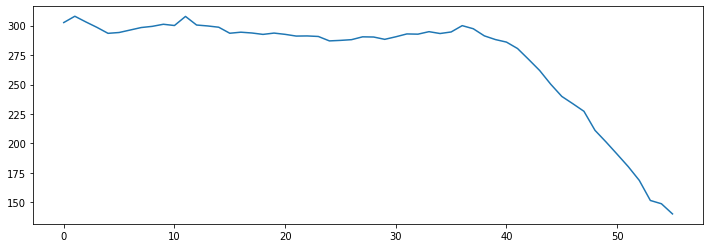

In [7]:
data = generate_data(num_days_with_leak = 14)

plt.figure(figsize=(12, 4))
plt.plot(data.end_day_measures)

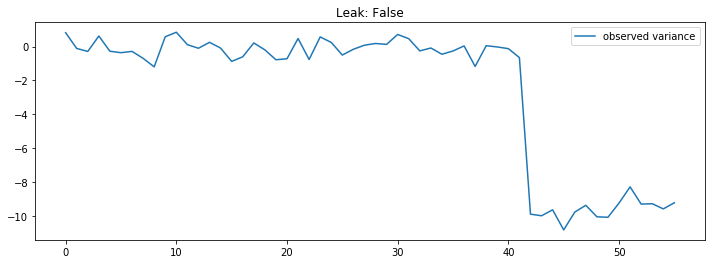

In [8]:
observed_variance = (data.end_day_measures 
                    - data.insertions 
                    + data.extractions  
                    - data.beginning_day_measures)

plt.figure(figsize=(12, 4))
plt.plot(observed_variance, label="observed variance")
plt.legend()
plt.title(f"Leak: {is_there_a_leak}")

plt.show()

In [9]:
initial_liquid = 300
num_days_train = 28
leak_per_day = 0.4*24
sensor_noise = 0.5
mean_liquid_insertion = 30
mean_liquid_extraction = 30
std_liquid_insertion = 2 + sensor_noise
std_liquid_extraction = 2 + sensor_noise

num_true_negative = 0
num_false_negative = 0
num_true_positive = 0
num_false_positive = 0

for i in range(1000):
    num_extra_days_without_leak = np.random.geometric(0.1)
    is_there_a_leak = np.random.rand() < 0.1
    num_days_with_leak = 14 if is_there_a_leak else 0

    data = generate_data(
        initial_liquid,
        num_days_train,
        num_extra_days_without_leak,
        num_days_with_leak,
        leak_per_day,
        sensor_noise,
        mean_liquid_insertion,
        mean_liquid_extraction,
        std_liquid_insertion,
        std_liquid_extraction)

    leak_index = train_predict_leak(data, num_days_train)

    if not is_there_a_leak and leak_index == -1:
        # correctly classified no leak
        num_true_negative += 1
    
    elif is_there_a_leak and leak_index != -1:
        # There is a leak and the model detected it 
        # Need to check first if the detected index was during the leak or a false alarm
        if leak_index >= (num_days_train + num_extra_days_without_leak - 1):
            # Not a false alarm
            num_true_positive += 1
        else:
            # False alarm, this counts as not detecting the leak
            num_false_positive += 1

    elif is_there_a_leak and leak_index == -1:
        # There is a leak but it was not detected
        num_false_negative += 1

    elif not is_there_a_leak and leak_index != -1:
        # There is not a leak and the model detected a leak
        num_false_positive += 1

In [36]:
print(f"""
TP ={num_true_positive:5}
FP ={num_false_positive:5}

TN ={num_true_negative:5}
FN ={num_false_negative:5}

Confusion Matrix:

             Actual
       | { ' '*2 + 'P' + ' '*2} | {' '*2 + 'N' + ' '*2} |
Pred P | {num_true_positive:5} | {num_false_positive:5} |
Pred N | {num_false_negative:5} | {num_true_negative:5} |
""")


TP =  293
FP =    1

TN =  706
FN =    0

Confusion Matrix:

             Actual
       |   P   |   N   |
Pred P |   293 |     1 |
Pred N |     0 |   706 |

